<a href="https://colab.research.google.com/github/K-3-LT/defacto_global_bu/blob/main/Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deFacto Global Training Material Data Scrapping

## Instructions
1. The program best runs on Jupyter Notebook.
2. Install selenium and bs4.
3. Download the latest version of chrome driver from https://chromedriver.chromium.org/ , make sure the excutable path is /usr/local/bin/
4. Make sure the chrome driver version matches the the user version of Chrome.

## Scrap Sample Content

In [ ]:
# Import packages
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [ ]:
# Set options for chrome
chrome_options = Options()
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
# Create a new instance of the chrome driver
driver = webdriver.Chrome(executable_path = '/usr/local/bin/chromedriver', chrome_options = chrome_options)

# Navigate to the website's login page
driver.get('https://training.defactoglobal.com/dashboard/')

In [ ]:
# Find the username and password input fields using ID attributes
username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

# Enter the username and password
username_field.send_keys('xxxxx')
password_field.send_keys('yyyyy')

# Submit the login form
password_field.submit()

In [ ]:
# Wait for the image element to be clickable
image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//img[@src="https://training.defactoglobal.com/wp-content/uploads/2020/04/Course1.png"]')))

# Click on the image
image_element.click()

In [ ]:
# Wait for the tab element to be clickable
tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//h5[contains(text(), "General Information")]')))

# Click on the tab
tab_element.click()

In [ ]:
# Wait for the page content to load
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))

<selenium.webdriver.remote.webelement.WebElement (session="b72380bac8cd281788b780e9bc2c26d4", element="EFEE47C627E1C8F5975DD8473BEF5894_element_62")>

### Scrapping all contents on this tab (General Information)

In [ ]:
# Get the page source
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Scrape everything on the page
all_elements = soup.find_all()

# Print the scraped elements
for element in all_elements:
    print(element)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>General Information – deFacto Planning TRAINING ENVIRONMENT</title>
<meta content="noindex,nofollow" name="robots"/>
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="//s.w.org" rel="dns-prefetch"/>
<link href="https://training.defactoglobal.com/feed/" rel="alternate" title="deFacto Planning TRAINING ENVIRONMENT » Feed" type="application/rss+xml"/>
<link href="https://training.defactoglobal.com/comments/feed/" rel="alternate" title="deFacto Planning TRAINING ENVIRONMENT » Comments Feed" type="application/rss+xml"/>
<script>
			window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/13.0.0\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/13.0.0\/svg\/","svgExt":".svg","source":{"concatemoji":"https:\/\/training.defactoglobal.com\/wp-includes\/js\/wp

### Scrapping selected contents on this tab (General Information)

In [ ]:
# Get the page source
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Scrape everything on the page
all_elements = soup.find('div', class_ = 'entry-content clear')

# Print the scraped elements
for element in all_elements:
    print(element)



<p class="llms-parent-course-link">Back to: <a class="llms-lesson-link" href="https://training.defactoglobal.com/course/defacto-planning-user-guide-modeler/">deFacto Planning Admin Guide – Modeler</a></p>


<p>deFacto Planning is a performance management solution tool that allows organizations to utilize real-time budgeting, forecasting, analysis and reporting across all functional units on one platform. The platform is Microsoft-centric and Tabular-based. deFacto Planning integrates with PowerBI and other Business Intelligence (BI) tools. Modeler functionality is the component of deFacto Planning where your application is built and maintained. </p>


<ul><li>Build Dimensions</li><li>Configure Models</li><li>Customize Calculations</li><li>Define Security</li><li>Creates SQL Server database – as you build your application</li><li>Creates Analysis Services cube – when you deploy your application</li></ul>


<h2><strong>Access to dFModeler</strong></h2>


<p>Users with a deFacto Adminis

In [ ]:
# Close the driver
driver.quit()

## 1. Extraction of All Tabs in Course 1
### "deFacto Planning Admin Guide – Modeler"

In [ ]:
# Set options for chrome
chrome_options = Options()
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
# Design a function that extract data in each tab
def login_and_scrape_tab(tab_xpath, tab_name):

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)

    try:
        # Navigate to the website's login page
        driver.get('https://training.defactoglobal.com/dashboard/')

        # Find the username and password input fields using ID attributes
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

        # Enter the username and password
        username_field.send_keys('BU_Capstone')
        password_field.send_keys('dFTr@in1ng_BU')

        # Submit the login form
        password_field.submit()

        # Wait for the image element to be clickable and click on it
        image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//img[@src="https://training.defactoglobal.com/wp-content/uploads/2020/04/Course1.png"]')))
        image_element.click()

        # Wait for the tab element to be clickable and click on it
        tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, tab_xpath)))
        tab_element.click()

        # Get the page source
        time.sleep(2)  # Add a small delay to ensure the page loads completely
        page_source = driver.page_source

        # Create BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')

        # Scrape everything on the page
        tab_content = soup.find('div', class_='entry-content clear')

        # Close the WebDriver
        driver.quit()

        return {
            "Tab_Name": tab_name,
            "Tab_Content": tab_content.text.strip()
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        driver.quit()
        return None

# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab1_data = login_and_scrape_tab('//h5[contains(text(), "General Information")]', 'General Information')
tab2_data = login_and_scrape_tab('//h5[contains(text(), "dFModeler Tools")]', 'dFModeler_Tools')
tab3_data = login_and_scrape_tab('//h5[contains(text(), "Application Overview")]', 'Application_Overview')
tab4_data = login_and_scrape_tab('//h5[contains(text(), "Create an Application")]', 'Create an Application')
tab5_data = login_and_scrape_tab('//h5[contains(text(), "Export/Import an Application")]', 'Export/Import an Application')
tab6_data = login_and_scrape_tab('//h5[contains(text(), "Delete Options")]', 'Delete Options')
tab7_data = login_and_scrape_tab('//h5[contains(text(), "Server Settings")]', 'Sever Settings')
tab8_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Overview")]', 'Dimension Overview')
tab9_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Types")]', 'Dimension Types')
tab10_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Members")]', 'Dimension Members')

end_time = time.time()  # End timing
time_difference_1 = end_time - start_time

#Randomly test some content
if tab1_data:
    print(tab1_data)

if tab2_data:
    print(tab2_data)

if tab3_data:
    print(tab3_data)

if tab4_data:
    print(tab4_data)

if tab5_data:
    print(tab5_data)

if tab6_data:
    print(tab6_data)

if tab7_data:
    print(tab7_data)

if tab8_data:
    print(tab8_data)

if tab9_data:
    print(tab9_data)

if tab10_data:
    print(tab10_data)

print('The total time to execute the data scraping in first 10 tab is', time_difference_1)

{'Tab_Name': 'General Information', 'Tab_Content': 'Back to: deFacto Planning Admin Guide – Modeler\ndeFacto Planning is a performance management solution tool that allows organizations to utilize real-time budgeting, forecasting, analysis and reporting across all functional units on one platform. The platform is Microsoft-centric and Tabular-based. deFacto Planning integrates with PowerBI and other Business Intelligence (BI) tools. Modeler functionality is the component of deFacto Planning where your application is built and maintained. \nBuild DimensionsConfigure ModelsCustomize CalculationsDefine SecurityCreates SQL Server database – as you build your applicationCreates Analysis Services cube – when you deploy your application\nAccess to dFModeler\nUsers with a deFacto Administrator license may access the dFModeler and Excel add-in. There are two types of Administrators:\nSystem Administratorshave administrator rights to run the Modeler against all deFacto applicationsmaintain Users

In [ ]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab11_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Hierarchies")]', 'Dimension Hierarchies')
tab12_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Properties")]', 'Dimension Properties')
tab13_data = login_and_scrape_tab('//h5[contains(text(), "Export/Import Dimensions")]', 'Export/Import Dimensions')
tab14_data = login_and_scrape_tab('//h5[contains(text(), "Delete a Dimension")]', 'Delete a Dimension')
tab15_data = login_and_scrape_tab('//h5[contains(text(), "Model Overview")]', 'Model Overview')
tab16_data = login_and_scrape_tab('//h5[contains(text(), "Deploy Application")]', 'Deploy Application')
tab17_data = login_and_scrape_tab('//h5[contains(text(), "Security Overview")]', 'Security Overview')
tab18_data = login_and_scrape_tab('//h5[contains(text(), "Secured Dimensions")]', 'Secured Dimensions')
tab19_data = login_and_scrape_tab('//h5[contains(text(), "Security Roles Overview")]', 'Security Roles Overview')
tab20_data = login_and_scrape_tab('//h5[contains(text(), "Define a Security Role")]', 'Define a Security Role')

end_time = time.time()  # End timing
time_difference_2 = end_time - start_time

#Randomly test some content
if tab11_data:
    print(tab11_data)

if tab12_data:
    print(tab12_data)

if tab13_data:
    print(tab13_data)

if tab14_data:
    print(tab14_data)

if tab15_data:
    print(tab15_data)

if tab16_data:
    print(tab16_data)

if tab17_data:
    print(tab17_data)

if tab18_data:
    print(tab18_data)

if tab19_data:
    print(tab19_data)

if tab20_data:
    print(tab20_data)

print('The total time to execute the data scraping in second 10 tab is', time_difference_2)

{'Tab_Name': 'Dimension Hierarchies', 'Tab_Content': 'Back to: deFacto Planning Admin Guide – Modeler\nDimension members can be organized into hierarchies, which represent the logical order for members to aggregate. A dimension can have more than one hierarchy, or have no hierarchies at all. A hierarchy can have multiple levels and multiple totals, or one level rolling up to a total. A hierarchy cannot have the same label as a property on the same dimension. While hierarchies are dimension specific, a member in a dimension can belong to more than one hierarchy. If a member is a parent-level and will cross hierarchies, take caution if the same base-level members do not roll into it across the hierarchies. See example below:       – Hierarchy A contains parent 1 with base members x, y & z rolling into it       – Hierarchy B contains parent 1 with base members c, d, e, x, y & z rolling into it        – When defining a report, ensure you select parent 1 from the correct hierarchy to preven

In [ ]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab21_data = login_and_scrape_tab('//h5[contains(text(), "Administrator Role")]', 'Administrator Role')
tab22_data = login_and_scrape_tab('//h5[contains(text(), "Business Rules Overview")]', 'Business Rules Overview')
tab23_data = login_and_scrape_tab('//h5[contains(text(), "Dynamic Members")]', 'Dynamic Members')
tab24_data = login_and_scrape_tab('//h5[contains(text(), "On Demand")]', 'On Demand')
tab25_data = login_and_scrape_tab('//h5[contains(text(), "Business Rule Library")]', 'Business Rule Library')
tab26_data = login_and_scrape_tab('//h5[contains(text(), "Automatic")]', 'Automatic')
tab27_data = login_and_scrape_tab('//h5[contains(text(), "Configure FX Translations")]', 'Configure FX Translations')
tab28_data = login_and_scrape_tab('//h5[contains(text(), "FX Business Rules")]', 'FX Business Rules')
tab29_data = login_and_scrape_tab('//h5[contains(text(), "Constant Currency")]', 'Constant Currency')
tab30_data = login_and_scrape_tab('//h5[contains(text(), "Data Locks Overview")]', 'Data Locks Overview')

end_time = time.time()  # End timing
time_difference_3 = end_time - start_time

#Randomly test some content
if tab21_data:
    print(tab21_data)

if tab22_data:
    print(tab22_data)

if tab23_data:
    print(tab23_data)

if tab24_data:
    print(tab24_data)

if tab25_data:
    print(tab25_data)

if tab26_data:
    print(tab26_data)

if tab27_data:
    print(tab27_data)

if tab28_data:
    print(tab28_data)

if tab29_data:
    print(tab29_data)

if tab30_data:
    print(tab30_data)

print('The total time to execute the data scraping in third 10 tab is', time_difference_3)

{'Tab_Name': 'Administrator Role', 'Tab_Content': 'Back to: deFacto Planning Admin Guide – Modeler\nEach application will have an Administrators role. The users assigned to this role will have read and write access to all models within the application in both the dFModeler and the deFacto Excel add-in. The License type of the Administrators role must stay on Administrator, and no further configuration is required.\n\n\nYou may also create additional roles with a License Type of Administrator that will allow you to provide Modeler access in a limited capacity. For example, if an Admin “lite” should only be allowed to modify dimensions and update security roles, update the Actions tab of the additional Administrators role to only allow access to those capabilities. You can also control which capabilities they can have in the Excel add-in.\n\n\nSystem Administrator\nSystem Administrators differ from Administrators in that they have access to all applications on the server. Administrators 

In [ ]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab31_data = login_and_scrape_tab('//h5[contains(text(), "Configure Data Locks")]', 'Configure Data Locks')
tab32_data = login_and_scrape_tab('//h5[contains(text(), "Lists Overview")]', 'Lists Overview')
tab33_data = login_and_scrape_tab('//h5[contains(text(), "Define a Book Publishing List")]', 'Define a Book Publishing List')
tab34_data = login_and_scrape_tab('//h5[contains(text(), "Define a Workflow List")]', 'Define a Workflow List')
tab35_data = login_and_scrape_tab('//h5[contains(text(), "Create and Use Variables")]', 'Create and Use Variables')
tab36_data = login_and_scrape_tab('//h5[contains(text(), "Using Partitions")]', 'Using Partitions')
tab37_data = login_and_scrape_tab('//h5[contains(text(), "Creating a Workflow")]', 'Creating a Workflow')
tab38_data = login_and_scrape_tab('//h5[contains(text(), "Assignment Task")]', 'Assignment Task')
tab39_data = login_and_scrape_tab('//h5[contains(text(), "Business Rule Task")]', 'Business Rule Task')
tab40_data = login_and_scrape_tab('//h5[contains(text(), "Process Task")]', 'Process Task')

end_time = time.time()  # End timing
time_difference_4 = end_time - start_time

#Randomly test some content
if tab31_data:
    print(tab31_data)

if tab32_data:
    print(tab32_data)

if tab33_data:
    print(tab33_data)

if tab34_data:
    print(tab34_data)

if tab35_data:
    print(tab35_data)

if tab36_data:
    print(tab36_data)

if tab37_data:
    print(tab37_data)

if tab38_data:
    print(tab38_data)

if tab39_data:
    print(tab39_data)

if tab40_data:
    print(tab40_data)


print('The total time to execute the data scraping in last 10 tabs is', time_difference_4)

{'Tab_Name': 'Configure Data Locks', 'Tab_Content': 'Back to: deFacto Planning Admin Guide – Modeler\nTo configure Data Locks, first decide if you need them set for all Models or for specific Models. The component you highlight on the left will indicate which level you are setting locks for (i.e. Data Locks – All Models will apply to all). Once checked out, there are 3 main areas you can define the Data Locks for: Locked Scenarios, Dimension Exceptions and Member Exceptions.\n1. Locked Scenarios       – place a check next to any Scenario member to lock data submissions for that intersection       – by default, new Scenario members added to the dimension will be unlocked       – if no other selections are made, data cannot be submitted to any intersection within that Scenario member2. Apply Dimension Exceptions       – if you only need data submissions to a Scenario member locked for certain intersections, but not all, apply Dimension exceptions to the locking       – click one Dimensio

In [ ]:
# Calculating the average time to scrap all content of this course
average_time = (time_difference_1 + time_difference_2  + time_difference_3 + time_difference_4 )/40

# Print it in minutes
print('The average time to extract each Tab from deFacto Planning Admin Guide – Modeler is', \
      round(average_time, 2), "seconds")

The average time to extract each Tab from deFacto Planning Admin Guide – Modeler is 9.35 seconds


In [ ]:
# Create a DataFrame
modeler_data = {

    "Tab_Content": [tab1_data, tab2_data, tab3_data, tab4_data, tab5_data,
                   tab6_data, tab7_data, tab8_data, tab9_data, tab10_data,
                   tab11_data, tab12_data, tab13_data, tab14_data, tab15_data,
                   tab16_data, tab17_data, tab18_data, tab19_data, tab20_data,
                   tab21_data, tab22_data, tab23_data, tab24_data, tab25_data,
                   tab26_data, tab27_data, tab28_data, tab29_data, tab30_data,
                   tab31_data, tab32_data, tab33_data, tab34_data, tab35_data,
                   tab36_data, tab37_data, tab38_data, tab39_data, tab40_data]
}

# Construct dataframe
df_modeler = pd.DataFrame(modeler_data)
print(df_modeler)

                                          Tab_Content
0   {'Tab_Name': 'General Information', 'Tab_Conte...
1   {'Tab_Name': 'dFModeler_Tools', 'Tab_Content':...
2   {'Tab_Name': 'Application_Overview', 'Tab_Cont...
3   {'Tab_Name': 'Create an Application', 'Tab_Con...
4   {'Tab_Name': 'Export/Import an Application', '...
5   {'Tab_Name': 'Delete Options', 'Tab_Content': ...
6   {'Tab_Name': 'Sever Settings', 'Tab_Content': ...
7   {'Tab_Name': 'Dimension Overview', 'Tab_Conten...
8   {'Tab_Name': 'Dimension Types', 'Tab_Content':...
9   {'Tab_Name': 'Dimension Members', 'Tab_Content...
10  {'Tab_Name': 'Dimension Hierarchies', 'Tab_Con...
11  {'Tab_Name': 'Dimension Properties', 'Tab_Cont...
12  {'Tab_Name': 'Export/Import Dimensions', 'Tab_...
13  {'Tab_Name': 'Delete a Dimension', 'Tab_Conten...
14  {'Tab_Name': 'Model Overview', 'Tab_Content': ...
15  {'Tab_Name': 'Deploy Application', 'Tab_Conten...
16  {'Tab_Name': 'Security Overview', 'Tab_Content...
17  {'Tab_Name': 'Secured Di

## 2. Extraction of All Tabs in Course 2
### "deFacto Planning User Guide – Planner"

In [ ]:
# Design a function that extract data in each tab
def login_and_scrape_tab(tab_xpath, tab_name):

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)

    try:
        # Navigate to the website's login page
        driver.get('https://training.defactoglobal.com/dashboard/')

        # Find the username and password input fields using ID attributes
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

        # Enter the username and password
        username_field.send_keys('BU_Capstone')
        password_field.send_keys('dFTr@in1ng_BU')

        # Submit the login form
        password_field.submit()

        # Wait for the image element to be clickable and click on it
        image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@href="https://training.defactoglobal.com/course/defacto-planning-user-guide-planner/"]')))
        image_element.click()

        # Wait for the tab element to be clickable and click on it
        tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, tab_xpath)))
        tab_element.click()

        # Get the page source
        time.sleep(2)  # Add a small delay to ensure the page loads completely
        page_source = driver.page_source

        # Create BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')

        # Scrape everything on the page
        tab_content = soup.find('div', class_='entry-content clear')

        # Close the WebDriver
        driver.quit()

        return {
            "Tab_Name": tab_name,
            "Tab_Content": tab_content.text.strip()
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        driver.quit()
        return None

# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab1_data = login_and_scrape_tab('//h5[contains(text(), "General Information")]', 'General Information')
tab2_data = login_and_scrape_tab('//h5[contains(text(), "Data Submission")]', 'Data Submission')
tab3_data = login_and_scrape_tab('//h5[contains(text(), "Create an Input Template")]', 'Create an Input Template')
tab4_data = login_and_scrape_tab('//h5[contains(text(), "Comments")]', 'Comments')
tab5_data = login_and_scrape_tab('//h5[contains(text(), "Add Suppressed Items")]', 'Add Suppressed Items')
tab6_data = login_and_scrape_tab('//h5[contains(text(), "Overview")]', 'Overview')
tab7_data = login_and_scrape_tab('//h5[contains(text(), "Clear Data")]', 'Clear Data')
tab8_data = login_and_scrape_tab('//h5[contains(text(), "Load Data")]', 'Load Data')
tab9_data = login_and_scrape_tab('//h5[contains(text(), "Extract Data")]', 'Extract Data')
tab10_data = login_and_scrape_tab('//h5[contains(text(), "Audit Data")]', 'Audit Data')
tab11_data = login_and_scrape_tab('//h5[contains(text(), "Run Business Rules")]', 'Run Business Rules')
tab12_data = login_and_scrape_tab('//h5[contains(text(), "Workflow Overview")]', 'Workflow Overview')
tab13_data = login_and_scrape_tab('//h5[contains(text(), "Using Workflow")]', 'Using Workflow')

end_time = time.time()  # End timing
time_difference_1 = end_time - start_time

#Randomly test some content
if tab1_data:
    print(tab1_data)

if tab2_data:
    print(tab2_data)

if tab3_data:
    print(tab3_data)

if tab4_data:
    print(tab4_data)

if tab5_data:
    print(tab5_data)

if tab6_data:
    print(tab6_data)

if tab7_data:
    print(tab7_data)

if tab8_data:
    print(tab8_data)

if tab9_data:
    print(tab9_data)

if tab10_data:
    print(tab10_data)

if tab11_data:
    print(tab11_data)

if tab12_data:
    print(tab12_data)

if tab13_data:
    print(tab13_data)

print('The total time to execute the data scraping in all 13 tabs is', time_difference_1)

{'Tab_Name': 'General Information', 'Tab_Content': 'Back to: deFacto Planning User Guide – Planner\ndeFacto Planning is a performance management solution tool that allows organizations to utilize real-time budgeting, forecasting, analysis and reporting across all functional units. The platform is Microsoft-centric and Tabular-based. deFacto Planning integrates with PowerBI and other Business Intelligence (BI) tools. Planner functionality is also contained within an Excel environment, and is the part of deFacto add-in that allows for write-back capability to the database. Security for data submission in the deFacto Excel add-in is controlled by Security Roles on a per user basis, as well as Data Locks (please see the Admin Guide for more information).  Access to the Planner functionality of the deFacto Excel add-in is handled the same way as Reporter functionality, using the same ribbon and connection credentials. \nInput TemplatesExcel template visually similar to a report but configur

In [ ]:
# Calculating the average time to scrap all content of this course
average_time = time_difference_1 / 13

# Print it in minutes
print('The average time to extract each Tab from deFacto Planning Admin Guide – Planner is', \
      round(average_time, 2), "seconds")

The average time to extract each Tab from deFacto Planning Admin Guide – Modeler is 9.65 seconds


In [ ]:
# Create a DataFrame
planner_data = {

    "Tab_Content": [tab1_data, tab2_data, tab3_data, tab4_data, tab5_data,
                   tab6_data, tab7_data, tab8_data, tab9_data, tab10_data,
                   tab11_data, tab12_data, tab13_data]
}

# Construct dataframe
df_planner = pd.DataFrame(planner_data)
print(df_planner)

                                          Tab_Content
0   {'Tab_Name': 'General Information', 'Tab_Conte...
1   {'Tab_Name': 'Data Submission', 'Tab_Content':...
2   {'Tab_Name': 'Create an Input Template', 'Tab_...
3   {'Tab_Name': 'Comments', 'Tab_Content': 'Back ...
4   {'Tab_Name': 'Add Suppressed Items', 'Tab_Cont...
5   {'Tab_Name': 'Overview', 'Tab_Content': 'Back ...
6   {'Tab_Name': 'Clear Data', 'Tab_Content': 'Bac...
7   {'Tab_Name': 'Load Data', 'Tab_Content': 'Back...
8   {'Tab_Name': 'Extract Data', 'Tab_Content': 'B...
9   {'Tab_Name': 'Audit Data', 'Tab_Content': 'Bac...
10  {'Tab_Name': 'Run Business Rules', 'Tab_Conten...
11  {'Tab_Name': 'Workflow Overview', 'Tab_Content...
12  {'Tab_Name': 'Using Workflow', 'Tab_Content': ...


## 3. Extraction of All Tabs in Course 3
### "deFacto Planning User Guide – Reporter"

In [ ]:
# Design a function that extract data in each tab
def login_and_scrape_tab(tab_xpath, tab_name):

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)

    try:
        # Navigate to the website's login page
        driver.get('https://training.defactoglobal.com/dashboard/')

        # Find the username and password input fields using ID attributes
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

        # Enter the username and password
        username_field.send_keys('BU_Capstone')
        password_field.send_keys('dFTr@in1ng_BU')

        # Submit the login form
        password_field.submit()

        # Wait for the image element to be clickable and click on it
        image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@href="https://training.defactoglobal.com/course/defacto-planning-user-guide-reporter/"]')))
        image_element.click()

        # Wait for the tab element to be clickable and click on it
        tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, tab_xpath)))
        tab_element.click()

        # Get the page source
        time.sleep(2)  # Add a small delay to ensure the page loads completely
        page_source = driver.page_source

        # Create BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')

        # Scrape everything on the page
        tab_content = soup.find('div', class_='entry-content clear')

        # Close the WebDriver
        driver.quit()

        return {
            "Tab_Name": tab_name,
            "Tab_Content": tab_content.text.strip()
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        driver.quit()
        return None

# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab1_data = login_and_scrape_tab('//h5[contains(text(), "General Information")]', 'General Information')
tab2_data = login_and_scrape_tab('//h5[contains(text(), "deFacto Ribbon")]', 'deFacto Ribbon')
tab3_data = login_and_scrape_tab('//h5[contains(text(), "deFacto Current View")]', 'deFacto Current View')
tab4_data = login_and_scrape_tab('//h5[contains(text(), "deFacto Tools")]', 'deFacto Tools')
tab5_data = login_and_scrape_tab('//h5[contains(text(), "Report Library – Open Report")]', 'Report Library – Open Report')
tab6_data = login_and_scrape_tab('//h5[contains(text(), "Investigate Data")]', 'Investigate Data')
tab7_data = login_and_scrape_tab('//h5[contains(text(), "Report Designer – Design Report")]', 'Report Designer – Design Report')
tab8_data = login_and_scrape_tab('//h5[contains(text(), "Report Designer – Copy Report")]', 'Report Designer – Copy Report')
tab9_data = login_and_scrape_tab('//h5[contains(text(), "Report Library – Import Report")]', 'Report Library – Import Report')
tab10_data = login_and_scrape_tab('//h5[contains(text(), "Using the Report Designer")]', 'Using the Report Designer')

end_time = time.time()  # End timing
time_difference_1 = end_time - start_time

#Randomly test some content
if tab1_data:
    print(tab1_data)

if tab2_data:
    print(tab2_data)

if tab3_data:
    print(tab3_data)

if tab4_data:
    print(tab4_data)

if tab5_data:
    print(tab5_data)

if tab6_data:
    print(tab6_data)

if tab7_data:
    print(tab7_data)

if tab8_data:
    print(tab8_data)

if tab9_data:
    print(tab9_data)

if tab10_data:
    print(tab10_data)
print('The total time to execute the data scraping in first 10 tabs is', time_difference_1)

{'Tab_Name': 'General Information', 'Tab_Content': 'Back to: deFacto Planning User Guide – Reporter\ndeFacto Planning is a performance management solution tool that allows organizations to utilize real-time budgeting, forecasting, analysis and reporting across all functional units. The platform is Microsoft-centric and Tabular-based. deFacto Planning integrates with PowerBI and other Business Intelligence (BI) tools. Reporter functionality is contained within an Excel environment, using the deFacto add-in as well as native Excel functionality.\ndeFacto is compatible with Excel 2013 and higherMacro security settings in Excel cannot be set to the most restrictive settingConnect using Windows Authentication or Active DirectoryRecommended to disable Office 365 automatic updates\n\nConnect to deFacto – Excel\nThere are two Authentication options available when connecting to the deFacto Excel add-in, depending on server configurations. \n\nIf you are logged into your machine with your Window

In [ ]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab11_data = login_and_scrape_tab('//h5[contains(text(), "Property Filter Expression")]', 'Property Filter Expression')
tab12_data = login_and_scrape_tab('//h5[contains(text(), "Report Headings")]', 'Report Headings')
tab13_data = login_and_scrape_tab('//h5[contains(text(), "Report Overrides")]', 'Report Overrides')
tab14_data = login_and_scrape_tab('//h5[contains(text(), "Report Formatting")]', 'Report Formatting')
tab15_data = login_and_scrape_tab('//h5[contains(text(), "Report Formulas")]', 'Report Formulas')
tab16_data = login_and_scrape_tab('//h5[contains(text(), "DFX Functions")]', 'DFX Functions')
tab17_data = login_and_scrape_tab('//h5[contains(text(), "Repeater")]', 'Repeater')
tab18_data = login_and_scrape_tab('//h5[contains(text(), "Range and Multi-Range")]', 'Range and Multi-Range')
tab18_data = login_and_scrape_tab('//h5[contains(text(), "Range Options")]', 'Range Options')
tab19_data = login_and_scrape_tab('//h5[contains(text(), "Overview")]', 'Overview')
tab20_data = login_and_scrape_tab('//h5[contains(text(), "Book Publish Configuration")]', 'Book Publish Configuration')

end_time = time.time()  # End timing
time_difference_2 = end_time - start_time

#Randomly test some content

if tab11_data:
    print(tab11_data)

if tab12_data:
    print(tab12_data)

if tab13_data:
    print(tab13_data)

if tab14_data:
    print(tab14_data)

if tab15_data:
    print(tab15_data)

if tab16_data:
    print(tab16_data)

if tab17_data:
    print(tab17_data)

if tab18_data:
    print(tab18_data)

if tab19_data:
    print(tab19_data)

if tab20_data:
    print(tab20_data)

print('The total time to execute the data scraping in second 10 tabs is', time_difference_2)

{'Tab_Name': 'Property Filter Expression', 'Tab_Content': 'Back to: deFacto Planning User Guide – Reporter\nThe Property Filter Expression features allows you to define a condition to filter a row or column based on a property of a selected dimension. Properties can be used on any dimension to provide further details on a member within that dimension. These properties can also be used to filter on when designing a report with the Expand and ExpandList actions only, eliminating the need to add more parent-level members or hierarchies. Some examples of properties may be regional breakdown on an Entity-type dimension, or payroll status (full-time/part-time) on an Employee dimension for HR reporting. In the below example, we will look at the Product Family of vehicles on Entity members using Property Filter Expressions. To filter within an expansion, add the Property attribute to all row/column nodes it applies to. You can hide this additional row/column in your report output, but it will 

In [ ]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab21_data = login_and_scrape_tab('//h5[contains(text(), "Email Published Book")]', 'Email Published Book')
tab22_data = login_and_scrape_tab('//h5[contains(text(), "Cached Reports")]', 'Cached Reports')
tab23_data = login_and_scrape_tab('//h5[contains(text(), "Using Macros in deFacto")]', 'Using Macros in deFacto')


end_time = time.time()  # End timing
time_difference_3 = end_time - start_time

#Randomly test some content

if tab21_data:
    print(tab11_data)

if tab22_data:
    print(tab12_data)

if tab23_data:
    print(tab13_data)


print('The total time to execute the data scraping in last 3 tabs is', time_difference_3)

{'Tab_Name': 'Property Filter Expression', 'Tab_Content': 'Back to: deFacto Planning User Guide – Reporter\nThe Property Filter Expression features allows you to define a condition to filter a row or column based on a property of a selected dimension. Properties can be used on any dimension to provide further details on a member within that dimension. These properties can also be used to filter on when designing a report with the Expand and ExpandList actions only, eliminating the need to add more parent-level members or hierarchies. Some examples of properties may be regional breakdown on an Entity-type dimension, or payroll status (full-time/part-time) on an Employee dimension for HR reporting. In the below example, we will look at the Product Family of vehicles on Entity members using Property Filter Expressions. To filter within an expansion, add the Property attribute to all row/column nodes it applies to. You can hide this additional row/column in your report output, but it will 

In [ ]:
# Calculating the average time to scrap all content of this course
average_time = (time_difference_1 + time_difference_2 + time_difference_3) / 23

# Print it in minutes
print('The average time to extract each Tab from deFacto Planning User Guide – Reporter is', \
      round(average_time, 2), "seconds")

The average time to extract each Tab from deFacto Planning User Guide – Reporter is 9.64 seconds


In [ ]:
# Create a DataFrame
reporter_data = {

    "Tab_Content": [tab1_data, tab2_data, tab3_data, tab4_data, tab5_data,
                   tab6_data, tab7_data, tab8_data, tab9_data, tab10_data,
                   tab11_data, tab12_data, tab13_data, tab14_data, tab15_data,
                   tab16_data, tab17_data, tab18_data, tab19_data, tab20_data,
                   tab21_data, tab22_data, tab23_data]
}

# Construct dataframe
df_reporter = pd.DataFrame(reporter_data)
print(df_reporter)

                                          Tab_Content
0   {'Tab_Name': 'General Information', 'Tab_Conte...
1   {'Tab_Name': 'deFacto Ribbon', 'Tab_Content': ...
2   {'Tab_Name': 'deFacto Current View', 'Tab_Cont...
3   {'Tab_Name': 'deFacto Tools', 'Tab_Content': '...
4   {'Tab_Name': 'Report Library – Open Report', '...
5   {'Tab_Name': 'Investigate Data', 'Tab_Content'...
6   {'Tab_Name': 'Report Designer – Design Report'...
7   {'Tab_Name': 'Report Designer – Copy Report', ...
8   {'Tab_Name': 'Report Library – Import Report',...
9   {'Tab_Name': 'Using the Report Designer', 'Tab...
10  {'Tab_Name': 'Property Filter Expression', 'Ta...
11  {'Tab_Name': 'Report Headings', 'Tab_Content':...
12  {'Tab_Name': 'Report Overrides', 'Tab_Content'...
13  {'Tab_Name': 'Report Formatting', 'Tab_Content...
14  {'Tab_Name': 'Report Formulas', 'Tab_Content':...
15  {'Tab_Name': 'DFX Functions', 'Tab_Content': '...
16  {'Tab_Name': 'Repeater', 'Tab_Content': 'Back ...
17  {'Tab_Name': 'Range Opti

## 4. Extraction of All Tabs in Course 4 (Welcome Course)
### "deFacto Planning TRAINING ENVIRONMENT"

In [ ]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

# Create a new instance of the Chrome driver
driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)


# Navigate to the website's login page
driver.get('https://training.defactoglobal.com/dashboard/')

# Find the username and password input fields using ID attributes
username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

# Enter the username and password
username_field.send_keys('BU_Capstone')
password_field.send_keys('dFTr@in1ng_BU')

# Submit the login form
password_field.submit()

# Wait for the image element to be clickable and click on it
image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@href="https://training.defactoglobal.com/course/welcome-to-defacto-training/"]')))
image_element.click()

# Wait for the tab content to load
tab_content_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'entry-content')))

# Get the page source
time.sleep(2)  # Add a small delay to ensure the page loads completely
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Scrape everything on the page
tab_content = soup.find('div', class_='entry-content clear')

# Close the WebDriver
driver.quit()

end_time = time.time()  # End timing
time_difference = end_time - start_time

# Print it in minutes
print('The average time to extract each Tab from deFacto Planning Welcome Page is', \
      round(time_difference, 2), "seconds")

The average time to extract each Tab from deFacto Planning Welcome Page is 9.6 seconds


In [ ]:
# Create a DataFrame
welcome_data = {

    "Tab_Content": [tab_content]
}

# Construct dataframe
df_welcome = pd.DataFrame(welcome_data)
print(df_welcome)

                                         Tab_Content
0  [\n, [Thank you for choosing deFacto Planning ...


## Final Combination and Analysis

In [ ]:
# Combine the DataFrames vertically
combined_df = pd.concat([df_modeler, df_planner, df_reporter, df_welcome], axis=0, ignore_index=True)

print(combined_df)

                                          Tab_Content
0   {'Tab_Name': 'General Information', 'Tab_Conte...
1   {'Tab_Name': 'dFModeler_Tools', 'Tab_Content':...
2   {'Tab_Name': 'Application_Overview', 'Tab_Cont...
3   {'Tab_Name': 'Create an Application', 'Tab_Con...
4   {'Tab_Name': 'Export/Import an Application', '...
..                                                ...
72  {'Tab_Name': 'Book Publish Configuration', 'Ta...
73  {'Tab_Name': 'Email Published Book', 'Tab_Cont...
74  {'Tab_Name': 'Cached Reports', 'Tab_Content': ...
75  {'Tab_Name': 'Using Macros in deFacto', 'Tab_C...
76  [\n, [Thank you for choosing deFacto Planning ...

[77 rows x 1 columns]


In [ ]:
# Display the shape of the combined dataframe
combined_df.shape

(77, 1)

In [ ]:
# Save the DataFrame to a CSV file
#csv_filename = 'raw_data.csv'
#df.to_csv(csv_filename, index=False)

#print(f"DataFrame saved to {csv_filename}")

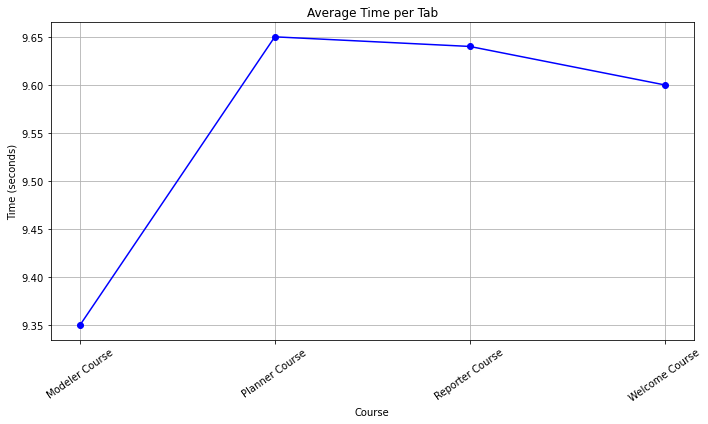

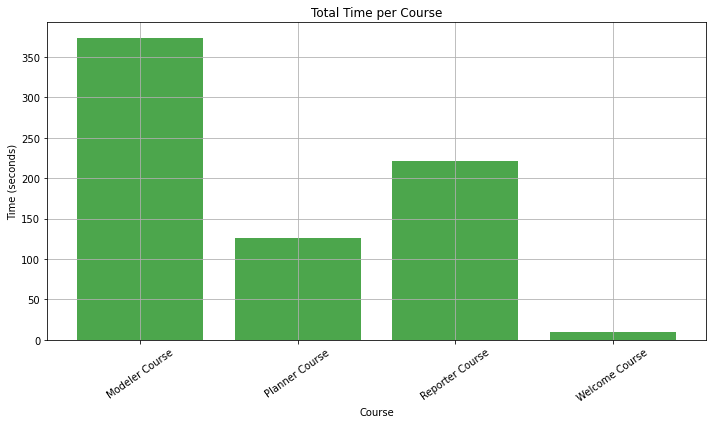

            Course  Average Time per Tab  Total Time per Course
0   Modeler Course                  9.35                 374.00
1   Planner Course                  9.65                 125.45
2  Reporter Course                  9.64                 221.72
3   Welcome Course                  9.60                   9.60


In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame
data = {
    'Course': ['Modeler Course', 'Planner Course', 'Reporter Course', 'Welcome Course'],
    'Average Time per Tab': [9.35, 9.65, 9.64, 9.60],
    'Total Time per Course': [374, 125.45, 221.72, 9.60]
}
df = pd.DataFrame(data)

# Create a line graph for Average Time per Tab
plt.figure(figsize = (10, 6))
plt.plot(df['Course'], df['Average Time per Tab'], marker = 'o', color = 'blue')
plt.title('Average Time per Tab')
plt.xlabel('Course')
plt.ylabel('Time (seconds)')
plt.xticks(rotation = 35)
plt.grid(True)
plt.tight_layout()

# Save the line graph as an image (optional)
plt.savefig('average_time_per_tab.png')

# Show the line graph
plt.show()

# Create a bar plot for Total Time per Course
plt.figure(figsize = (10, 6))
plt.bar(df['Course'], df['Total Time per Course'], color = 'green', alpha = 0.7)
plt.title('Total Time per Course')
plt.xlabel('Course')
plt.ylabel('Time (seconds)')
plt.xticks(rotation = 35)
plt.grid(True)
plt.tight_layout()

# Save the bar plot as an image (optional)
plt.savefig('total_time_per_course.png')

# Show the bar plot
plt.show()

# Display the DataFrame
print(df)